# Machine Learning and Statistics Project, November 2019
***

## **Submitted by:** Francis Adepoju (G00364694)
***
## __Title:__ Using Descriptive Statistics and Plots to Describe the Boston House Prices Dataset 
***


## Summary of the dataset:
#### The Boston data frame has 506 rows and 14 columns. This data frame contains the following columns:
1. __crim__   - per capita crime rate by town.
2. __zn__     - proportion of residential land zoned for lots over 25,000 sq.ft.
3. __indus__  - proportion of non-retail business acres per town.
4. __chas__   - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. __nox__    - nitrogen oxides concentration (parts per 10 million).
6. __rm__     - average number of rooms per dwelling.
7. __age__    - proportion of owner-occupied units built prior to 1940.
8. __dis__    - weighted mean of distances to five Boston employment centres.
9. __rad__    - index of accessibility to radial highways.
10. __tax__    - full-value property-tax rate per **`$10,000`**.
11. __ptratio__  - pupil-teacher ratio by town.
12. __black__  - `1000 * (Bk - 0.63)^2` where Bk is the proportion of blacks by town.
13. __lstat__  - lower status of the population (percent).
14. __medv__  - median value of owner-occupied homes in **`$1,000`**.

#### NOTE: 
1. The __medv__ variable is the target (y) variable. The prices of the house indicated by the __medv__ variable is therefore our target variable and the remaining 13 are the feature variables.The effect of the these 13 variables on house prices are to be investigated and predicted.
2. In this project, we use the Python[1], scipy[2], keras[3], and Jupyter[4] packages to produce a comprehensive description, inference and prediction of house prices using the Boston house prices' dataset [5] 

***
## 1. Description
***

#### Import necessary Libraries

In [173]:
#====1
# Library for generating random variables.
import numpy as np

# Library for handling data.
import pandas as pd

# random number gen
from random import sample
from numpy.random import randn

# Library for plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# #=====2
# # Library for t-tests and ANOVA.
# import scipy.stats as stats

# # For Machine Learning
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import scipy.linalg as sl

# #=====3
# # For more practical ML,  Import linear_model from sklearn.
# import keras as kr
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# import sklearn.linear_model as lm
# # Data Scaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error,mean_squared_error

In [174]:
# Make the plots bigger.
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### 1.1 Load Dataset from my gitHub repository and gain some insight about the dataset

In [175]:
# Let's use pandas to read this csv file and organise the housing data.
# Load the boston-housing dataset... This is the URL from "raw" version of housing.csv file from my github
#df = pd.read_csv("housingCSV2.csv")
df = pd.read_csv("https://raw.githubusercontent.com/dewaledr/MLearning-Projects/master/housing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [176]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


#### To get some basic statistics about our data like mean, median, count etc. we use __.describe()__ method:

In [177]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [178]:
# Investigate the data for missing or non values...
print("Number of rows in this dataset :", len(df.index))
print("====================================")
df.info()

Number of rows in this dataset : 506
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 1.2 Data Backup and Clean up...

In [179]:
# Make a copy of the dataset for Stage 2
df2 = df.copy(deep=True)
# Another copy for Stage 3 - Prediction
df3 = df.copy(deep=True)

In [180]:
# df2.head()

* Generally, NaN or missing values can be in any form like 0, ?, or may be written as “missing” 
* As observed in our dataset above __(chas and zn)__, there are a lot of  0’s, 
* Therefore we can replace them with NaN to calculate how much data we are missing [6].

In [181]:
#print(df2.head())
df2.zn.replace(0, np.nan, inplace=True)
df2.chas.replace(0, np.nan, inplace=True)

In [182]:
#After replacing let’s again use .info() method to see the details about missing values in our dataset:
#df2.info()

#### 1.2.2 Calculate the percentageof features with missing values
* Generally, if there is 20-25% missing values we can impute them with different ways like mean, median or an educated guess by us. 
* But if it’s more than that, it’s better to remove those features otherwise they can affect our result. 
* As we can see below both “zn” and “chas” missing more than 70% data so we will remove both these 2 features.

In [183]:
df2.isnull().sum()/len(df2)*100

crim        0.000000
zn         73.517787
indus       0.000000
chas       93.083004
nox         0.000000
rm          0.000000
age         0.000000
dis         0.000000
rad         0.000000
tax         0.000000
ptratio     0.000000
black       0.000000
lstat       0.000000
medv        0.000000
dtype: float64

In [184]:
df2 = df2.drop("zn", 1)
df2 = df2.drop("chas", 1)

In [185]:
df2.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 1.3 Multi-Linear Regression on the dataset - Statsmodel

In [186]:
#=====2
# Library for t-tests and ANOVA.
import scipy.stats as stats

# For Machine Learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.linalg as sl

In [187]:
# Let's attempt to do linear regression on these variables.
x = df2[['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 
          'ptratio', 'black', 'lstat']]

In [188]:
# House price relationship.
y = df2['medv']
#y.head()

In [189]:
# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)

# Fit the data.
rsm = msm.fit()

# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     121.0
Date:                Mon, 25 Nov 2019   Prob (F-statistic):          1.87e-132
Time:                        22:18:33   Log-Likelihood:                -1509.6
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     494   BIC:                             3094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3083      5.200      7.175      0.0

/Users/francisadepoju/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 1.3.1 REMARKS:
The condition number is large, 15,100. This might indicate that there are strong multicollinearity or other numerical problems... Need to investigate this!
In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.[7]

***
### Multi-linear regression on the dataset - SKLearn - [REF][https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

In [190]:
# Create a linear regression model instance.
m = lm.LinearRegression()

#### 1.3.2:
Assuming that the following Linear Relationship exists between the remaining features and the output (house prices):
***

$$ medv = int+ a (crim) + b (indus)  + c (nox) + d (rm) + e (age) + 
          f (dis) + g (rad) + h (tax) + i (ptratio) + j (black) + k (lstat) $$
int = intercept
***

In [191]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [192]:
# Here's our intercept.
m.intercept_

37.30833678353185

In [193]:
# Here's our coefficients, in order.
m.coef_

array([-1.03402051e-01,  1.82116406e-02, -1.78291762e+01,  4.07437888e+00,
       -2.64677545e-03, -1.21018231e+00,  3.04603188e-01, -1.09013226e-02,
       -1.13114598e+00,  9.85349521e-03, -5.25072184e-01])

In [194]:
# See how good our fit is.
m.score(x, y)

0.7293219233110855

### 1.3.2 REMARKS:
These results agree largely with those from statsmodel. Therefore, we can use statsmodel or sklearn for the descriptive analysis.
Statsmodel involves calling fewer command to achieve the same outputs as sklearn
Statsmodels fared quite well with Panda's data frames while sklearn models work with arrays (ndarray).

### 1.3.3 Histogram:
Now let’s plot the histogram of all the available features to see the distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c51a2bd90>,
      dtype=object)

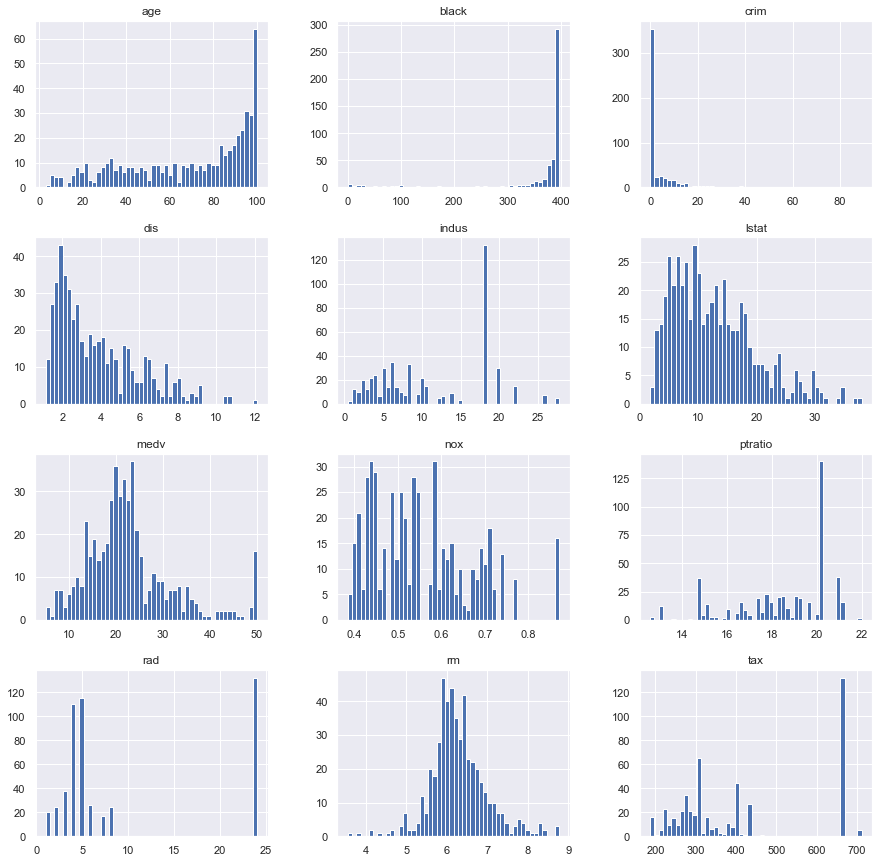

In [195]:
df2.hist(bins=50, figsize=(15, 15))

### 1.3.4 Correlation:
Now let’s check the correlation between all the feature variable and target variable by plotting the heatmap as shown below:

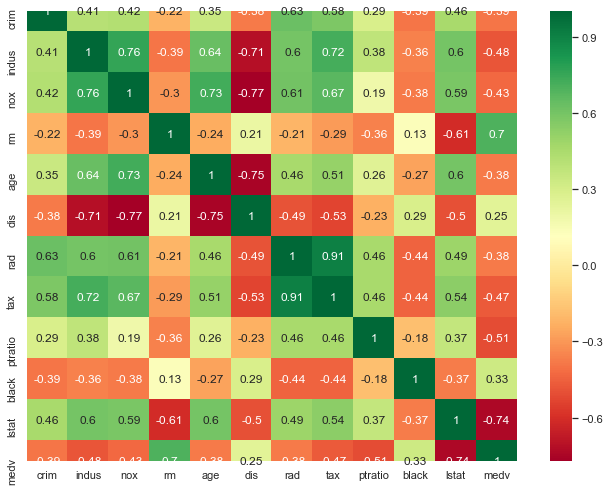

In [196]:
### set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df2.corr().round(2), square=True, cmap='RdYlGn', annot=True)

### Observation from Heat Map:
- From the above correlation plot, we can see that MEDV is strongly correlated to LSTAT, RM
- RAD and TAX are strongly correlated, so we don’t include this in our features together to avoid multicollinearity. Similar to the features DIS and AGE which have a correlation of -0.75. So we will exclude these four features from our features list.


### NOTE:
- From Heat map above, we know that it will be neat to exclude the following features, in addition to the earlier ones from the regression equation:
__(zn, chas, medv,rad, tax, dis, age)__
- As Scikit learn wants “features” and “target” variables in X and Y respectively. 
- Here __medv__ is our target variable, we can extract features and target arrays from our dataset as shown below. 
- From X we drop the medv column along with other features and in y we keep only __medv__ column:

In [197]:
xdrop = df2.drop(["medv","rad","tax","dis","age"], 1).values
y3 = df2["medv"].values

In [198]:
# Let's re-do linear regression on these variables.
x3 = df2[['crim', 'indus', 'nox', 'rm', 'ptratio', 'black', 'lstat']]

In [199]:
# # Tell statmodels to include an intercept.
xwithc = sm.add_constant(x3)

# Create a model.
msm = sm.OLS(y3, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     158.2
Date:                Mon, 25 Nov 2019   Prob (F-statistic):          3.22e-122
Time:                        22:18:37   Log-Likelihood:                -1544.1
No. Observations:                 506   AIC:                             3104.
Df Residuals:                     498   BIC:                             3138.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8620      4.548      2.828      0.0

/Users/francisadepoju/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 1.3.4 REMARKS:
The condition number is is still large (7760,) but better than earlier (15,100). This might indicate that there are still strong multicollinearity or other numerical problems... Need to investigate this further!

***
## Turning to Statistics:
1. Features with high coefficients should be included in the regression
2. For multi-linear regression, adjusted R-squared is one of the most common measures of goodness of fit. In other words it is a universal measure to evaluate how well linear regressions fair and compare.[7]. It is a much more appropriate measure for a multiple linear regression because it steps on the R-squared and adjusts for the number of variables included in the model. If we are using features with little or no explanatory power. The R squared would increase nonetheless.
3. As observed, adjusted R-squared is still much lower than the R-squared this indicates that one or more of the predictors have little or no explanatory power, so more investigation is needed.
4. Turning to the Summary report from the statsmodel, we were given the p values of the features which we later use to determine whether the independent variables were relevant for the model. If a variable has a **p value above 0.05** we can disregard it. Thus (crim, indus and nox should be dropped)
***

In [200]:
xdrop = df2.drop(["medv","rad","tax","dis","age","crim","indus","nox"], 1).values
y4 = df2["medv"].values

In [201]:
# Let's re-do linear regression on these variables.
x4 = df2[[ 'rm', 'ptratio', 'black', 'lstat']]

In [202]:
# # Tell statmodels to include an intercept.
xwithc = sm.add_constant(x4)

# Create a model.
msm = sm.OLS(y4, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     275.9
Date:                Mon, 25 Nov 2019   Prob (F-statistic):          4.10e-125
Time:                        22:18:37   Log-Likelihood:                -1545.8
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     501   BIC:                             3123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0548      4.220      2.857      0.0

***
### 1.4 Summary Observation:
1. The condition number is is still large (6,810) but better than earlier (7,760). This indicates that there are still strong multicollinearity or other numerical problems.
2. Adjusted R-squared is still lower than the R-squared but better than previous prediction. This indicates that one or more of the predictors still have little or no explanatory power.
3. There are no more features with p value > 0.05
***

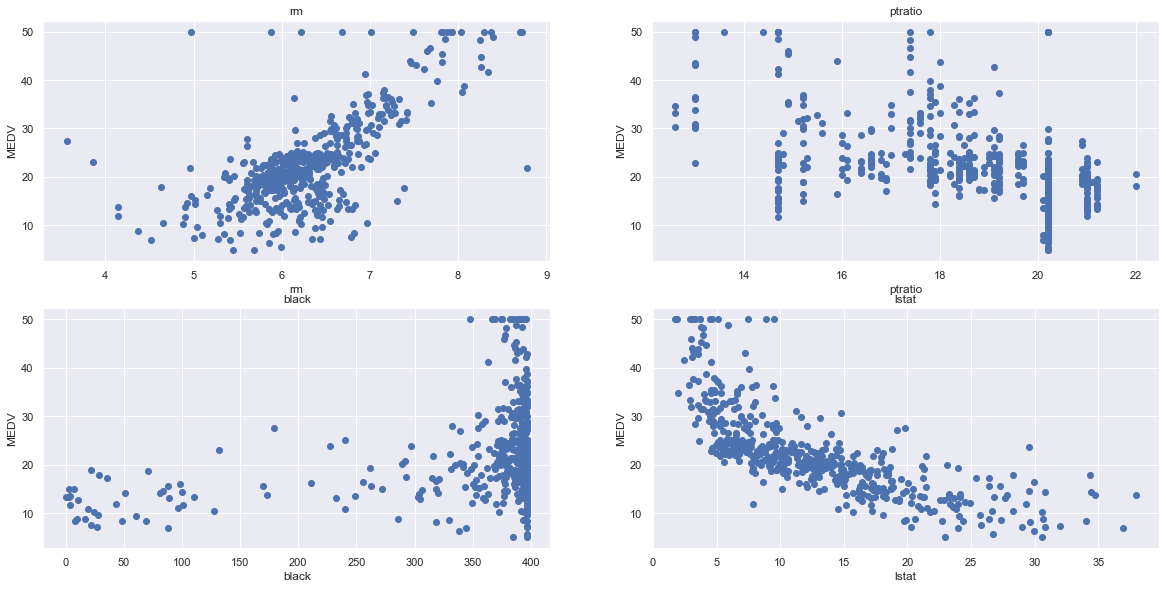

In [203]:
plt.figure(figsize=(20, 15))
#features = ['crim','indus','nox','rm','ptratio','black','lstat']
features = ['rm','ptratio','black','lstat']
target = df2['medv']
for i, col in enumerate(features):
    plt.subplot(3, len(features)/2 , i+1)
    x3 = df2[col]
    y3 = target
    plt.scatter(x3, y3, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


- From the above visualization, we can conclude that **medv** and **rm** are linearly correlated 
- __(medv)__ increase with an increase in __(rm)__ which is number of rooms and looks like both are following a linear relationship. 
- Also when population of lower status percentage __(lstat)__ increases,house price __(medv)__ or price decreases.

***
## 2. Inference
***

Inferential statistics use a random sample of data taken from a population to describe and make inferences about the population. Inferential statistics are valuable when examination of each member of an entire population is not convenient or possible.
Inferential statistics use statistical models to help compare the sample data to other samples or to previous research. 
https://www.statisticshowto.datasciencecentral.com/inferential-statistics/
Most research uses statistical models called the Generalized Linear model and include Student’s t-tests, ANOVA (Analysis of Variance), regression analysis and various other models that result in straight-line (“linear”) probabilities and results. The main indexes for inferential statistics articles are:
* Binomial Theorem
* Hypothesis Testing
* Normal Distributions
* T-Distributions
* Central Limit Theorem
* Confidence Intervals
* Regression Analysis / Linear Regression
* Comparison of Means.


In [204]:
# Let's make a copy of the dataset and then separate the chars column to show houses that are along the Charles river
# (chas = 1) and those that are not (chas = 0);
# print(df.head())
# print(df2.head())
# print(df3.head())

In [205]:
df3_0 = df[df3['chas'] == 0]
df3_1 = df[df3['chas'] == 1]
n_0 = df3_0['chas'].count()
n_1 = df3_1['chas'].count()

In [206]:
print("Non-boundary Houses: ", n_0)
print("Boundary Houses    : ", n_1)
print("Total no. Houses   : ", n_0 + n_1)


Non-boundary Houses:  471
Boundary Houses    :  35
Total no. Houses   :  506


### NOTE:
- Above count shows there are **35** houses bounds the Charles river while **471** houses do not.
- To make a reasonable inference with t-test or Anova, a random sample of 30 houses are selected from each group as follows:

In [207]:
# create random index of 30 out of the lot

#np.random.seed(101)  #Seeding not working here? 
rindex_0 =  np.array(sample(range(len(df3_0)), 30))
rindex_1 =  np.array(sample(range(len(df3_1)), 30))
# print(rindex_0)
# print(rindex_1)
# get 30 random rows from each of the dataframes and then print them out (using iloc for positional indexing)
dfr_0 = df3_0.iloc[rindex_0]
dfr_1 = df3_1.iloc[rindex_1]
# print(dfr_0)
# print(dfr_1)

# Count the samples.
nA = dfr_0['chas'].count()
nB = dfr_1['chas'].count()
print(f'Non-Boundary houses = {nA}')
print(f'Boundary houses     = {nB}')

# Calculate the means.
mA = dfr_0['medv'].sum() / nA
mB = dfr_1['medv'].sum() / nB

# Print to 2 decimal places
print(f"mean of medv for Non-Bounded houses   = {mA:.2f}")
print(f"mean of medv for Bounded houses = {mB:.2f}")

Non-Boundary houses = 30
Boundary houses     = 30
mean of medv for Non-Bounded houses   = 22.34
mean of medv for Bounded houses = 29.55


In [208]:
# Set parameters for two populations.
popA = {'m': mA, 's': 0.50}
popB = {'m': mB, 's': 0.50}

# # Create two samples, one from each population.
# # Create two samples, one from each population.
# sampA = np.random.normal(popA['m'], popA['s'], 100)

sampA = np.random.normal(popA['m'], popA['s'], 30)
sampB = np.random.normal(popB['m'], popB['s'], 30)
print(sampA)
print(sampB)

[22.63342365 21.52932609 22.67876756 22.35305274 21.50085817 22.50698655
 22.07376474 23.39886369 22.43876199 23.49149363 22.70451187 21.90845437
 22.49281576 22.46158881 22.77208244 21.55953428 22.21405152 22.05093987
 22.45849782 22.44039023 22.50392237 22.67724259 22.25297173 22.73006986
 22.14837093 22.13534076 22.51176959 22.43813766 21.848612   23.45577762]
[29.06097038 28.78550023 30.11351816 29.81076003 29.74339705 29.23141335
 28.84752183 29.43701131 29.52382843 29.55287716 29.59348066 30.16707297
 28.99782016 28.59266226 29.35661492 28.71363708 28.17816937 30.30794772
 29.63567121 29.23326396 29.35112218 30.41840514 30.11167569 29.99556482
 29.71209948 29.01514222 29.48397627 29.0738726  30.56143876 29.02348747]


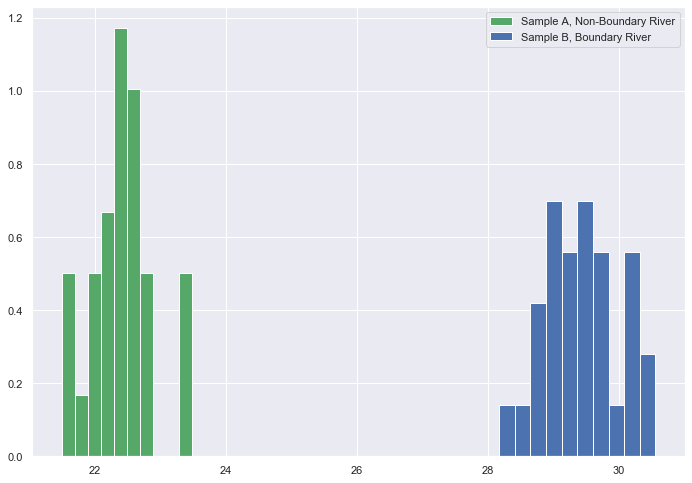


***********************************************
mean of medv for Non-Bounded houses  = 22.34
mean of medv for Bounded houses      = 29.55
***********************************************


In [209]:
# Plot histograms of the two samples.
plt.hist(sampA, density=True, color='g', label="Sample A, Non-Boundary River")
plt.hist(sampB, density=True, color='b', label="Sample B, Boundary River")


# Display a legend.
plt.legend()
plt.show()
print("")

print("***********************************************")
print(f"mean of medv for Non-Bounded houses  = {mA:.2f}")
print(f"mean of medv for Bounded houses      = {mB:.2f}")
print("***********************************************")

In [210]:
## with equal length dataset taking 30 rows at random.==> pValue too small, < 0.05 
# we therefore reject the null hypothesis. Mean of house prices equal.
# print(dfr_0['medv'])
# print(dfr_0['medv'].count())

# print(dfr_1['medv'])
# print(dfr_1['medv'].count())
# T test
# print(stats.ttest_ind(dfr_0['medv'], dfr_1['medv']))
# print(sampA)
# print(sampB)

In [211]:
stats.ttest_ind(sampA, sampB)

Ttest_indResult(statistic=-50.707629034029296, pvalue=9.710837928667192e-50)

In [212]:
# Anova... gives the same result as the t-test!
# stats.f_oneway(dfr_0['medv'], dfr_1['medv'])
stats.f_oneway(sampA, sampB)

F_onewayResult(statistic=2571.2636422527285, pvalue=9.710837928667286e-50)

***

### 2.1 Calculating the t-statistic

From the WikiPedia pages for [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_equal_variance) and [Variance](https://en.wikipedia.org/wiki/Variance#Sample_variance).

Note that we are using the calculations for two samples, with equal variances, and possibly different sample sizes. Because the ratio of [0:1] is  471:35, we decided to use equal sample size of 30.

$$ {\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}\cdot {\sqrt {{\frac {1}{n_{1}}}+{\frac {1}{n_{2}}}}}}}} $$

$$ {\displaystyle s_{p}={\sqrt {\frac {\left(n_{1}-1\right)s_{X_{1}}^{2}+\left(n_{2}-1\right)s_{X_{2}}^{2}}{n_{1}+n_{2}-2}}}} $$

$$ {\displaystyle s^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}\left(Y_{i}-{\overline {Y}}\right)^{2}} $$

In [216]:
# # Count the samples.
nA = float(len(sampA))
nB = float(len(sampB))
print(nA)
print(nB)
# # Calculate the means.
mA = sampA.sum() / nA
mB = sampB.sum() / nB

# Sample variances.
varA = ((sampA - mA)**2).sum() / (nA - 1.0)
varB = ((sampB - mB)**2).sum() / (nB - 1.0)

# Pooled standard deviation.
sp = np.sqrt(((nA - 1.0) * varA + (nB - 1.0) * varB) / (nA + nB - 2.0))

# t-statistic
t = (mA - mB) / (sp * np.sqrt((1.0 / nA) + (1.0 / nB)))

print(f"Mean of sample A:       {mA:8.4f}")
print(f"Mean of sample B:       {mB:8.4f}")
print(f"Size of sample A:       {nA:8.4f}")
print(f"Size of sample B:       {nB:8.4f}")
print(f"Variance of sample A:   {varA:8.4f}")
print(f"Variance of sample B:   {varB:8.4f}")
print(f"Pooled std dev:         {sp:8.4f}")
print(f"t-statistic:            {t:8.4f}")

30.0
30.0
Mean of sample A:        22.4123
Mean of sample B:        29.4543
Size of sample A:        30.0000
Size of sample B:        30.0000
Variance of sample A:     0.2463
Variance of sample B:     0.3323
Pooled std dev:           0.5379
t-statistic:            -50.7076


### Note that the t-statistics is same as t-test from earlier...

#### 2.1.1 Critical values

* For a two-tail test (e.g. $H_0$: the means are equal) we reject the null hypothesis $H_0$ if the value of the t-statistic from the samples is further away from zero than the t-statistic at the ($0.5 / 2.0 =$) $0.025$ level.

2.0017174830120923


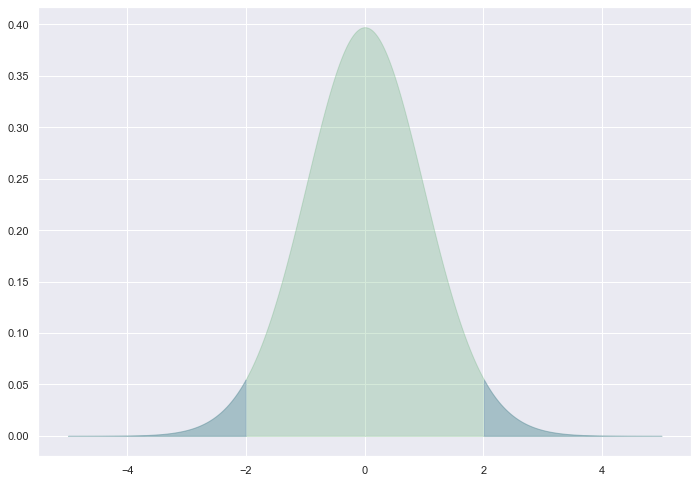

In [218]:
# x values for plotting.
x = np.linspace(-5.0, 5.0, 1000)

# The probability density functions (PDFs) for the t distribution.
# The number of degrees of freedom is (nA + nB - 2).
pdf = stats.t.pdf(x, (nA + nB - 2.0))

# Create a dataframe from x and pdf.
df = pd.DataFrame({'x': x, 'y': pdf})

# Plot the overall distribution.
plt.fill_between(df['x'], df['y'], color='g', alpha=0.25)

# Plot the values more extreme than our |t|.
crit = np.abs(stats.t.ppf(0.975, nA + nB - 2.0))     #ppf
tail1 = df[df['x'] >=  crit]
tail2 = df[df['x'] <= -crit]
plt.fill_between(tail1['x'], tail1['y'], color='b', alpha=0.25)
plt.fill_between(tail2['x'], tail2['y'], color='b', alpha=0.25)

print(crit)

plt.show()

* t-statistics is much lesser than the critical value therefore __we reject__ the null hypothesis. 
* The mean of house prices - those along & those not along the river are certainly different. 

***
## 3. Prediction
***

In [219]:
# For Machine Learning.
import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sklearn.linear_model as lm
# Data Scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Error Library
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Library for generating random variables.
import numpy as np
# Library for handling data.
import pandas as pd

### 3.1 The dataset, input and output view

Peek into the dataset once more...

In [221]:
df3.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### The first task is to split the dataset into two random samples (80% and 20%) for 80% training and 20% testing

### 3.2 Partition the dataset to Training and Test  - ratio(80:20) (The dataset, input and output view)

In [223]:
# Convert Pandas to Numpy for Keras

# Features
X = df3[['crim', 'zn', 'indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']].values
# Label

y  = df3['medv'].values
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

# REF: [https://stackoverflow.com/questions/24147278/
# how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas]
#df = pd.DataFrame(np.random.randn(10, 5))        #...5 columns of 100 random data

# trainSeries = dfp.sample(frac=0.8,random_state=111,axis=0) #random state is a seed value
# testSeries  = dfp.drop(trainSeries.index)

# # Training Set 80%
# inputTrainDataX  = trainSeries[['crim', 'zn', 'indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]
# outputTrainDataY = trainSeries[['medv']]

# # Test Set 20%
# inputTestDataX  = testSeries[['crim', 'zn', 'indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]
# outputTestDataY = testSeries[['medv']]

# # Confirm their lengths
# print(len(trainSeries)) 
# print(len(testSeries))

# print(len(inputTrainDataX)) 
# print(len(outputTrainDataY))

# print(len(inputTestDataX)) 
# print(len(outputTestDataY))

In [225]:
print("=====================================")
print("Size of Test data is:\t\t", len(X_test))
print("Size of Training data is: \t", len(X_train))
print("Total size of dataset is: \t", len(X_test) + len(X_train))
print("=====================================")
# print(inputTrainDataX)

Size of Test data is:		 102
Size of Training data is: 	 404
Total size of dataset is: 	 506


### 3.3 Create the model

#### 3.3.1 Scale the trainData (to range between 0 & 1) so it will work well with sgd [REFz]

In [227]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [228]:
model = Sequential()

model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
# Final output node for prediction
model.add(Dense(1))

### 3.4 Compile and train the model (fitting the data) 

In [229]:
#model.compile(optimizer='rmsprop',loss='mse')
model.compile(optimizer='adam',loss='mse')

In [230]:
model.fit(X_train,y_train,epochs=250,verbose=1)

Train on 404 samples
Epoch 1/250
404/404 [==============================] - 1s 2ms/sample - loss: 573.8353
Epoch 2/250
404/404 [==============================] - 0s 84us/sample - loss: 545.8141
Epoch 3/250
404/404 [==============================] - 0s 77us/sample - loss: 489.5074
Epoch 4/250
404/404 [==============================] - 0s 70us/sample - loss: 377.6796
Epoch 5/250
404/404 [==============================] - 0s 71us/sample - loss: 206.3378
Epoch 6/250
404/404 [==============================] - 0s 69us/sample - loss: 133.7409
Epoch 7/250
404/404 [==============================] - 0s 68us/sample - loss: 114.3870
Epoch 8/250
404/404 [==============================] - 0s 68us/sample - loss: 98.1682
Epoch 9/250
404/404 [==============================] - 0s 74us/sample - loss: 83.5339
Epoch 10/250
404/404 [==============================] - 0s 67us/sample - loss: 72.6767
Epoch 11/250
404/404 [==============================] - 0s 65us/sample - loss: 63.8669
Epoch 12/250
404/404 [===

In [231]:
#model.history.history

In [232]:
loss = model.history.history['loss']

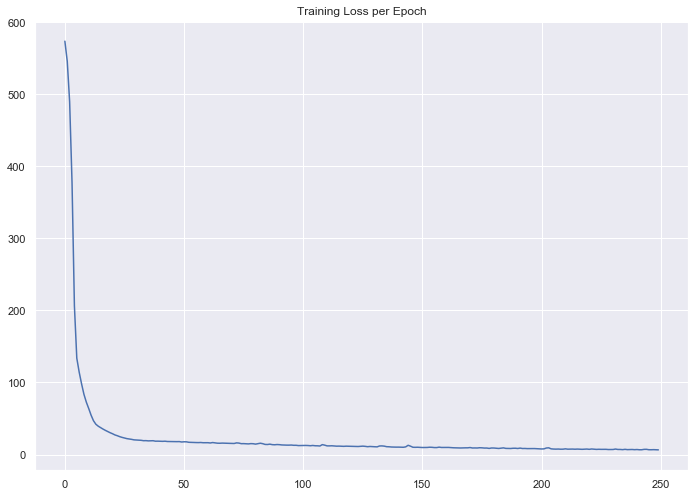

In [233]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### 3.6 Predict and View the output

In [237]:
model.metrics_names

['loss']

In [238]:
# # Predicted output 
# np.around(m.predict(scaledTrain_df).T)

In [239]:
# # Expected output
# outputTrainDataY.values.reshape(1,405)

### 3.6.1 Observe the variation between prediction and real values

In [240]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [241]:
#print(error_in_prediction)

In [245]:
# Mean Square error of this prediction
# np.sqrt(np.sum((error_in_prediction)**2))
print("Training Score = :", training_score.round(4))
print("    Test Score = :", test_score.round(4))

Training Score = : 6.3624
    Test Score = : 12.4981


### 3.7 Tweaking the model and Visually comparing the outputs

In [300]:
train_prediction = model.predict(X_train)
#train_prediction.T

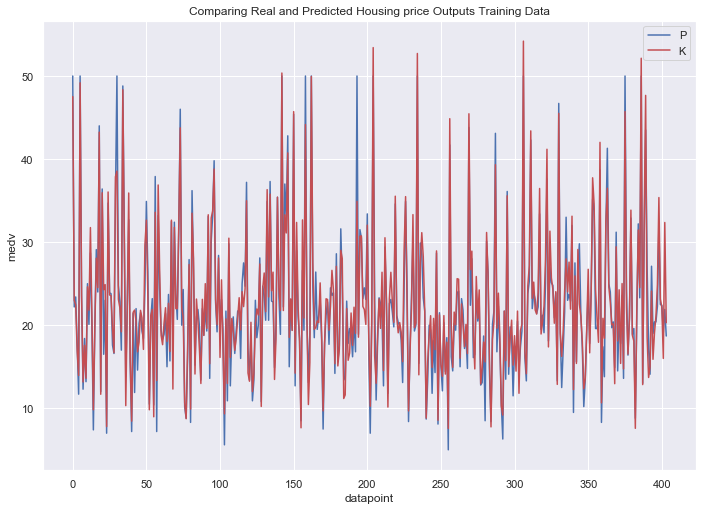

In [301]:
# Create plots of the 2 Outputs for better visual comparison 101
xT = np.arange(0.0,404.0,1)

# yTPr = m.predict(scaledTest_df)        # Predicted Y
# yTKn   = outputTestDataY              # Known Y

plt.plot(xT, y_train, 'b-')
plt.plot(xT, train_prediction, 'r-')
plt.title("Comparing Real and Predicted Housing price Outputs Training Data")
plt.xlabel("datapoint")
plt.ylabel("medv")
plt.legend("PK")

plt.show()

## 3.8 Time to test the model with the testData...

In [302]:
test_predictions = model.predict(X_test)

#test_predictions.T

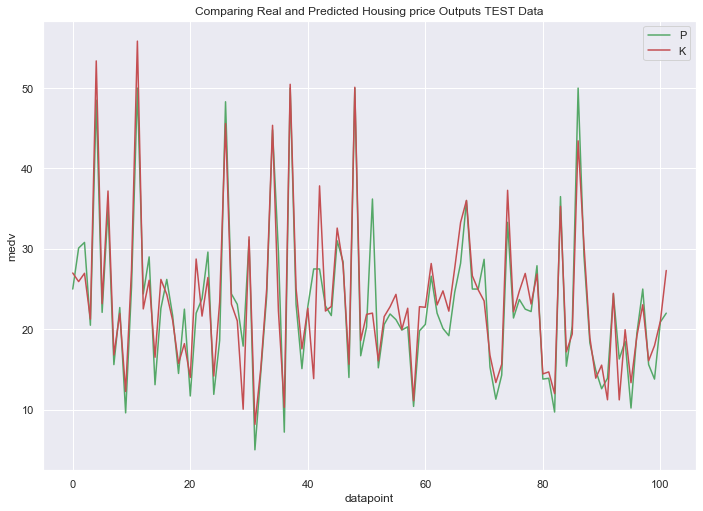

In [303]:
# Create plots of the 2 Outputs for better visual comparison 101
xT = np.arange(0.0,102.0,1)

# yTPr = m.predict(scaledTest_df)        # Predicted Y
# yTKn   = outputTestDataY              # Known Y

plt.plot(xT, y_test, 'g-')
plt.plot(xT, test_predictions, 'r-')
plt.title("Comparing Real and Predicted Housing price Outputs TEST Data")
plt.xlabel("datapoint")
plt.ylabel("medv")
plt.legend("PK")

plt.show()

In [304]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
pred_df.shape

(102, 1)

In [305]:
test_predictions = pd.Series(test_predictions.reshape(102,))

In [306]:
test_predictions

0      26.995928
1      25.929159
2      26.960432
3      21.255384
4      53.378757
         ...    
97     23.042204
98     16.074951
99     17.963591
100    21.009546
101    27.307825
Length: 102, dtype: float32

In [307]:
pred_df         = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test-Y','Y-Predicted']

pred_df

# # TODO3 Error in TEST DATA
# error_in_TEST_prediction = m.predict(scaledTest_df).T - outputTestDataY.values.reshape(1,101)

# # Mean Square error of this prediction
# np.sqrt(np.sum((error_in_TEST_prediction)**2))

,Test-Y,Y-Predicted
0,25.0,26.995928
1,30.1,25.929159
2,30.8,26.960432
3,20.5,21.255384
4,48.5,53.378757
...,...,...
97,25.0,23.042204
98,15.6,16.074951
99,13.8,17.963591
100,20.9,21.009546


In [308]:
# Plot and See

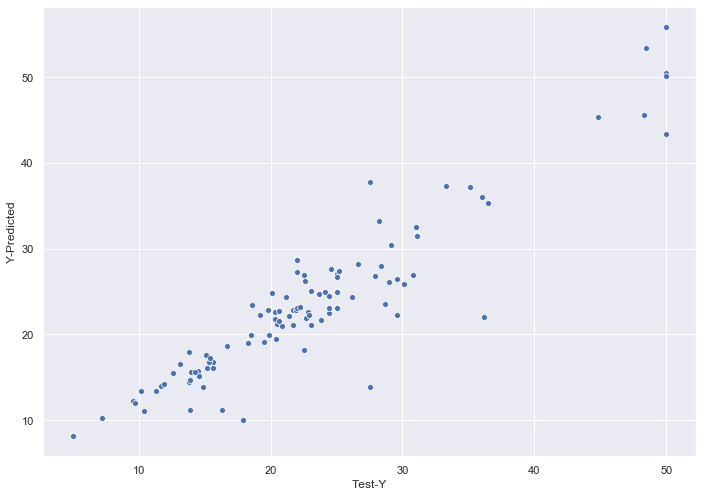

In [310]:
sns.scatterplot(x='Test-Y',y='Y-Predicted',data=pred_df)

In [313]:
pred_df['Error'] = pred_df['Test-Y'] - pred_df['Y-Predicted']

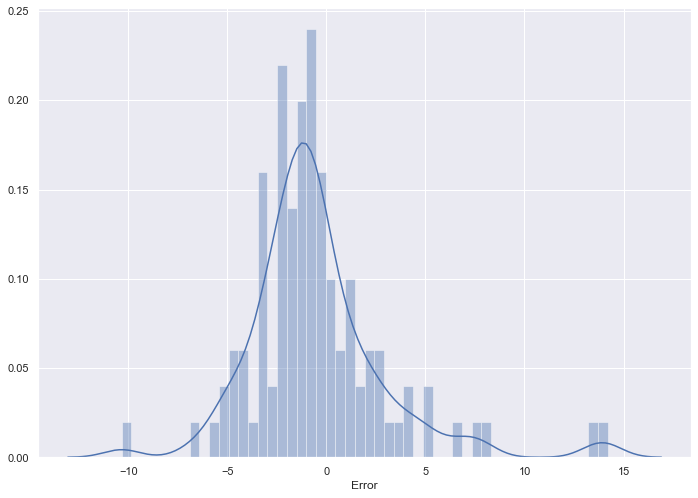

In [314]:
sns.distplot(pred_df['Error'],bins=50)

In [321]:
mean_absolute_error(pred_df['Test-Y'],pred_df['Y-Predicted']).round(4)

2.5121

In [320]:
mean_squared_error(pred_df['Test-Y'],pred_df['Y-Predicted']).round(4)

12.4981

In [319]:
# Essentially the same thing, difference just due to precision
test_score.round(4)

12.4981

In [323]:
#RMSE
(test_score**0.5).round(4)

3.5353

NOTE: Kaggle account opened & housing.csv dataset downloaded - Today 3rd October, 2019
# References:
#### [1] Python Software Foundation: https://www.python.org/
#### [2] SciPy developers: https://www.scipy.org/
#### [3] Keras: https://keras.io/
#### [4] Project Jupyter: https://jupyter.org/
#### [5] Housing Values in Suburbs of Boston: https://www.kaggle.com/c/boston-housing.
#### [6] Online Resources: https://www.weirdgeek.com/2018/12/linear-regression-to-boston-housing-dataset/ 
#### [7] Wiki: https://en.wikipedia.org/wiki/Multicollinearity